# Finding Heavy Traffic Indicators

The project is about analysing traffic data on a dataset of I-94 interstate highway. The goal is to determine a few likelihoods of heavy traffic on the highways.

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print("\n")
print(traffic.tail(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


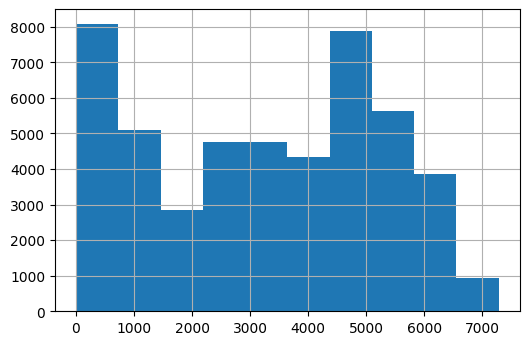

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].hist()
plt.show()
traffic['traffic_volume'].describe()

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].head(10)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]

In [24]:
daytime_data = traffic[traffic['date_time'].dt.hour.between(7,18)]
nighttime_data = traffic[~traffic['date_time'].dt.hour.between(7,18)]

In [20]:

daytime_data.shape

(23877, 9)

In [22]:

nighttime_data.shape

(24327, 9)

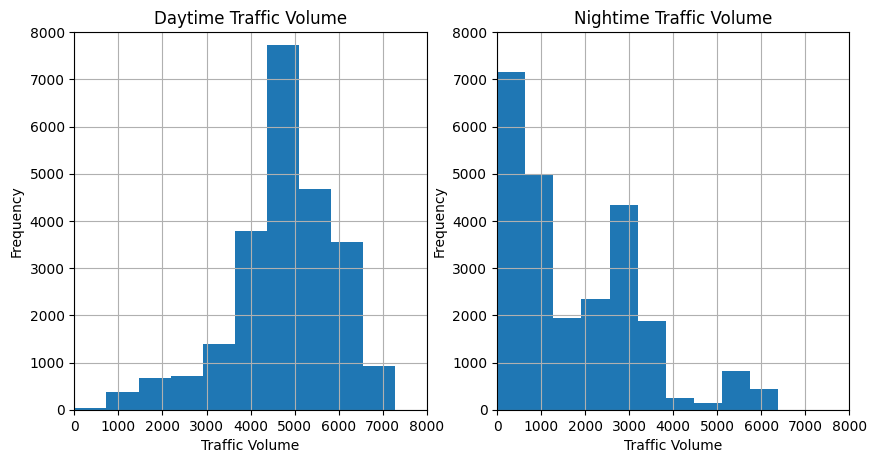

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
daytime_data['traffic_volume'].hist()
plt.title("Daytime Traffic Volume")
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1,2,2)
nighttime_data['traffic_volume'].hist()
plt.title("Nightime Traffic Volume")
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

In [34]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [35]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [39]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-39-51b386012796>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

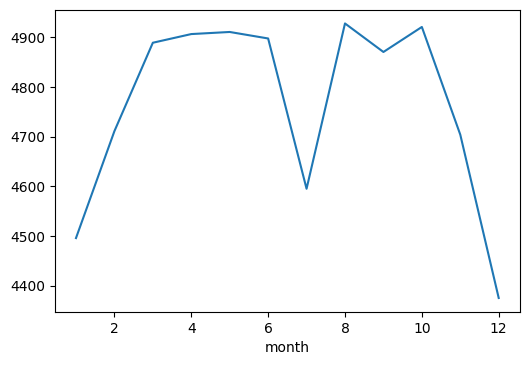

In [40]:
by_month['traffic_volume'].plot()
plt.show()

<ipython-input-42-e7e36723fbb5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



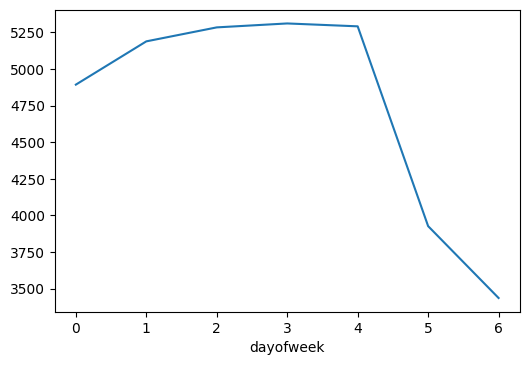

In [42]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
# 0 is Monday, 6 is Sunday

by_dayofweek['traffic_volume'].plot()
plt.show()

In [43]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data[daytime_data['dayofweek'] <= 4]
weekends = daytime_data[daytime_data['dayofweek'] > 4]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekends['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-43-e979a9ee0550>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



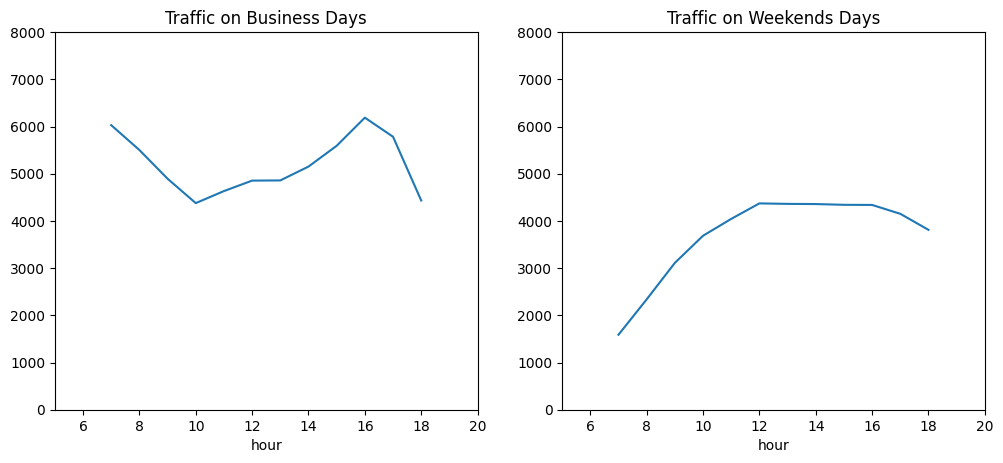

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Traffic on Business Days')
plt.xlim([5,20])
plt.ylim([0,8000])

plt.subplot(1,2,2)
by_hour_weekends['traffic_volume'].plot()
plt.title('Traffic on Weekends Days')
plt.xlim([5,20])
plt.ylim([0,8000])

plt.show()

In [50]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

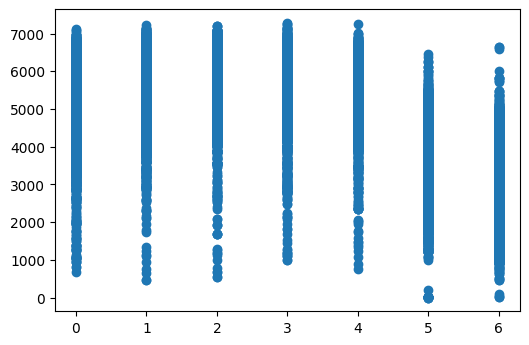

In [51]:
plt.scatter(x=daytime_data['dayofweek'], y=daytime_data['traffic_volume'])
plt.show()

In [53]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

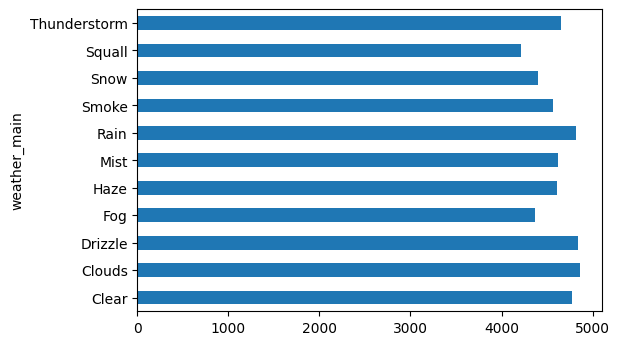

In [55]:
by_weather_main['traffic_volume'].plot.barh()

In [56]:
by_weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

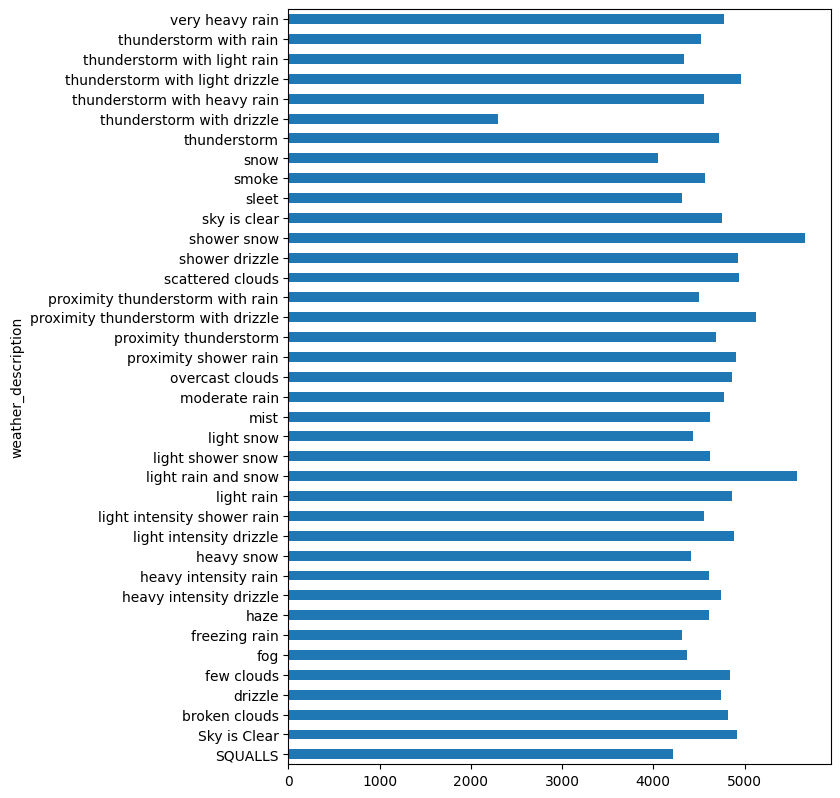

In [61]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7,10))
plt.show()